# 1.A

In [1]:
import torch
import numpy as np
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True, 
    download=True,
    transform=ToTensor() 
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

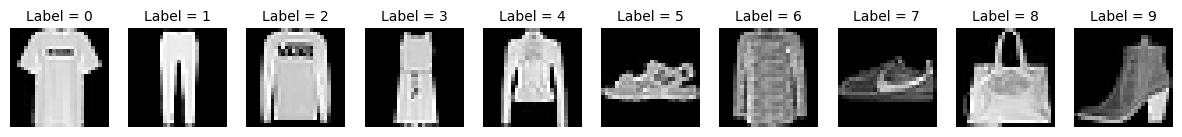

In [3]:
#torch.manual_seed(0)
fig, axs = plt.subplots(1, 10)
fig.set_figwidth(15)
for i in range(10):
    x = (training_data.targets==i).nonzero(as_tuple=True)
    idx = x[0][torch.randint(1,len(x[0]),(1,1))]
    img, label = training_data[idx.item()]
    axs[i].set_title(f"Label = {label}", fontsize=10)
    axs[i].imshow(img.squeeze(), cmap="gray")
    axs[i].axis(False)


# 1.B

In [4]:
class NeuralNetwork:
    def __init__(self, h=0):
        self.h = h # Number of hidden layers
        
    def ReLU(self,Z):
        return torch.max(Z, torch.zeros_like(Z))
    
    def softmax(self,Z):
        Y = torch.zeros_like(Z)
        for i in range(Y.shape[0]):
            y = torch.exp(Z[i])
            y = Z[i]
            Y[i]= y / y.sum()
        return Y
        
    def forward(self, X, W, b):
        Z = X
        for i in range(self.h):
            Z = Z @ W[i] + b[i]
            Z = self.ReLU(Z) # ReLU activation function for hidden layers
        Z = Z @ W[-1] + b[-1]   
        return self.softmax(Z) # Softmax layer for output

In [5]:
h = 3 # Creats a Neural Network with 3 hiden layers
model = NeuralNetwork(h) 

# 1.C

In [11]:
from torch.utils.data import DataLoader

def initialize(n,m):
    W=[]
    W.append(torch.rand(n, 64, requires_grad=True))
    W.append(torch.rand(64, 32, requires_grad=True))
    W.append(torch.rand(32, 16, requires_grad=True))
    W.append(torch.rand(16, m, requires_grad=True))
    b=[]
    b.append(torch.rand(1, 64, requires_grad=True))
    b.append(torch.rand(1, 32, requires_grad=True))
    b.append(torch.rand(1, 16, requires_grad=True))
    b.append(torch.rand(1, m, requires_grad=True))
    return W, b

def preprocessing(train_batch, batch_size, n):
    for batch in range(batch_size):
        Y_train = torch.eye(10)[train_batch[1]] # Create one-hot output
        if batch == 0:
             X_train = train_batch[0][batch][0].reshape(1,n)
        else:
             X_train = torch.cat((X_train , train_batch[0][batch][0].reshape(1,n)) ,dim=0) 
    return X_train, Y_train
    
def train(model, training_data, W, b, batch_size, epoch, k, n, learning_rate):
    for epc in range(epoch):
        train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
      # test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)
        for i in range(int(k)):
            train_batch = next(iter(train_dataloader))
          # test_batch = next(iter(test_dataloader))
            X_train, Y_train = preprocessing(train_batch, batch_size, n)
            Y_predicted = model.forward(X_train, W, b)
            e = (Y_predicted-Y_train)*(Y_predicted-Y_train)
            e.sum().backward()
            for j in range(4):
                with torch.no_grad():
                    W[j] = W[j] - learning_rate * W[j].grad
                    b[j] = b[j] - learning_rate * b[j].grad
                W[j].requires_grad=True
                b[j].requires_grad=True
    return e.sum()

In [13]:
n = np.power(np.max(training_data[0][0].shape),2)
m = torch.unique(training_data.targets).numel()
learning_rate = 0.1
batch_size = 60
k = len(training_data.targets) / batch_size
epoch = 10
W, b = initialize(n,m)

In [14]:
e = train(model, training_data, W, b, batch_size, epoch, k, n, learning_rate)

In [15]:
e

tensor(53.9726, grad_fn=<SumBackward0>)